In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder


In [3]:
#Data collection and analysis
df=pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
 #handling missing value
df['Age'].mean()


29.69911764705882

In [24]:
#converting categorical data to numerical
le = LabelEncoder()
df['Name']= le.fit_transform(df['Name'])
df['Sex']= le.fit_transform(df['Sex'])
df['Ticket']= le.fit_transform(df['Ticket'])
df['Cabin']= le.fit_transform(df['Cabin'])
df['Embarked']= le.fit_transform(df['Embarked'])

In [25]:
#filling the missing value 
df['Age'].fillna(df['Age'].mean(),inplace=True)

df['Cabin'].fillna(df['Cabin'].mean(),inplace=True)

df['Embarked'].fillna(df['Embarked'].mean(),inplace=True)

In [27]:
#Data Analysis
sns.set()

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_2408\11624123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ticket'])


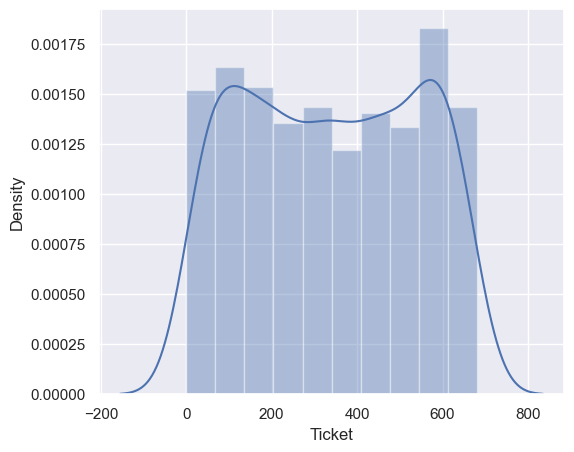

In [30]:
plt.figure(figsize=(6,5))
sns.distplot(df['Ticket'])
plt.show()

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_2408\250987305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Survived'])


<Axes: xlabel='Survived', ylabel='Density'>

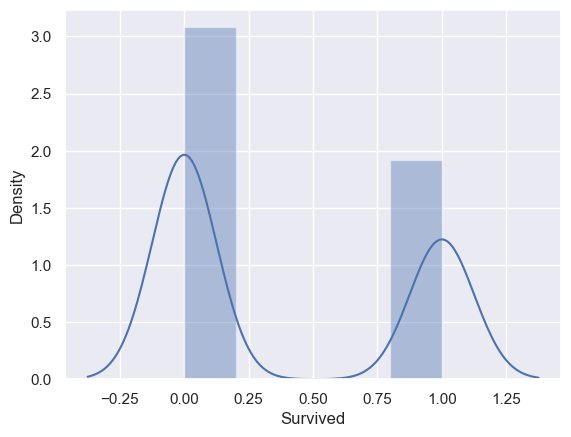

In [32]:
sns.distplot(df['Survived'])

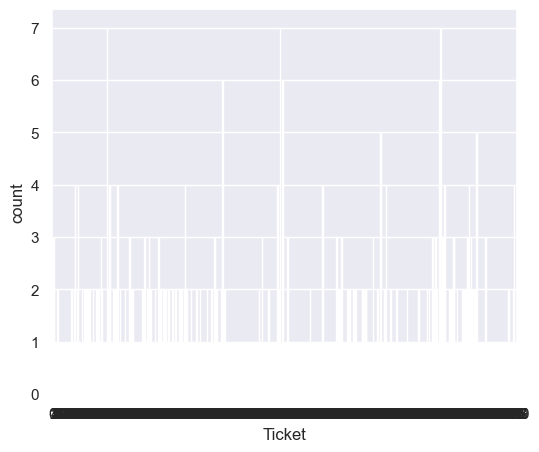

In [50]:
plt.figure(figsize=(6,5))
sns.countplot(x='Ticket', data=df)
plt.show()


In [51]:
df.value_counts()

PassengerId  Survived  Pclass  Name  Sex  Age        SibSp  Parch  Ticket  Fare    Cabin  Embarked
1            0         3       108   1    22.000000  1      0      523     7.250   47     2           1
599          0         3       98    1    29.699118  0      0      192     7.225   147    0           1
588          1         1       267   1    60.000000  1      1      74      79.200  29     0           1
589          0         3       284   1    22.000000  0      0      79      8.050   147    2           1
590          0         3       566   1    29.699118  0      0      515     8.050   147    2           1
                                                                                                     ..
301          1         3       431   0    29.699118  0      0      513     7.750   147    1           1
302          1         3       518   1    29.699118  2      0      441     23.250  147    1           1
303          0         3       411   1    19.000000  0      0      57

In [53]:
#spliting the feature and target
x= df.drop(columns='Embarked',axis=1)
y = df['Embarked']

In [54]:
print(x)

     PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

     Ticket     Fare  Cabin  
0       523   7.2500     47  
1       596  71.2833     81  
2       669   7.9250 

In [55]:
print(y)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


In [57]:
#spliting the data into training and testing data
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(891, 11) (712, 11) (179, 11)


In [60]:
#Model training
# XGBoost Regressor model

regressor = XGBRegressor()

In [61]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
#Evaluation
training_data_prediction = regressor.predict(x_train)

In [75]:
#square value
r2_value = metrics.r2_score(y_train, training_data_prediction)

In [80]:
print('R square value',r2_value)

R square value 0.5586381972687189


In [77]:
#checking for test data
testing_data_prediction =regressor.predict(x_test)

In [78]:
r2_value = metrics.r2_score(y_test,testing_data_prediction)

In [79]:
print('R square value',r2_value)

R square value 0.5586381972687189
